## Import the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Dataset Load

In [2]:
data = pd.read_csv('retail_salesc.csv')


## Display the structure and summary of the data

In [4]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  1000 non-null   int64  
 1   Order Date      1000 non-null   object 
 2   Customer ID     1000 non-null   object 
 3   Age             1000 non-null   int64  
 4   Gender          1000 non-null   object 
 5   City            1000 non-null   object 
 6   Category        1000 non-null   object 
 7   Quantity        1000 non-null   int64  
 8   Price Per Item  1000 non-null   float64
 9   Total Price     1000 non-null   float64
 10  Payment Method  1000 non-null   object 
 11  Sales           1000 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB
None
       Transaction ID          Age     Quantity  Price Per Item  Total Price  \
count     1000.000000  1000.000000  1000.000000     1000.000000   1000.00000   
mean       500.500000    43.414000  

## Check for missing values

In [5]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Transaction ID    0
Order Date        0
Customer ID       0
Age               0
Gender            0
City              0
Category          0
Quantity          0
Price Per Item    0
Total Price       0
Payment Method    0
Sales             0
dtype: int64


## Handle missing values for numeric columns


In [6]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
if missing_values[numeric_columns].sum() > 0:
    imputer = SimpleImputer(strategy='median')
    data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

## Handle missing values for non-numeric columns if any

In [7]:
categorical_columns = data.select_dtypes(include=[object]).columns
for column in categorical_columns:
    if missing_values[column] > 0:
        data[column] = data[column].fillna(data[column].mode()[0])

## Check for duplicate rows


In [8]:
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


## Remove duplicate rows

In [9]:
data = data.drop_duplicates()

## Display unique values for some columns

In [10]:
print(data['Gender'].unique())
print(data['City'].unique())
print(data['Category'].unique())

['Female' 'Male']
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorado Springs'
 'Belleville' 'Taylor' 'Lakewood' 'Arlington' 'Arvada' 'Hackensack'
 

## Display the structure and summary of the cleaned data

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  1000 non-null   int64  
 1   Order Date      1000 non-null   object 
 2   Customer ID     1000 non-null   object 
 3   Age             1000 non-null   int64  
 4   Gender          1000 non-null   object 
 5   City            1000 non-null   object 
 6   Category        1000 non-null   object 
 7   Quantity        1000 non-null   int64  
 8   Price Per Item  1000 non-null   float64
 9   Total Price     1000 non-null   float64
 10  Payment Method  1000 non-null   object 
 11  Sales           1000 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB
None


## Descriptive statistics


In [13]:
mean_sales = data['Sales'].mean()
median_sales = data['Sales'].median()
std_sales = data['Sales'].std()

print("Mean Sales:", mean_sales)
print("Median Sales:", median_sales)
print("Standard Deviation of Sales:", std_sales)

Mean Sales: 241.1307679
Median Sales: 55.739999999999995
Standard Deviation of Sales: 595.8785682824405


## Save cleaned data to a new CSV file


In [14]:
data.to_csv('retail_sales_cleaned.csv', index=False)


## Load cleaned data



In [15]:
data = pd.read_csv('retail_sales_cleaned.csv')


## Display the first few rows of the dataset



In [16]:
print(data.head())

   Transaction ID Order Date Customer ID  Age  Gender             City  \
0               1   8-Nov-17    CG-12520   28  Female        Henderson   
1               2   8-Nov-17    CG-12520   21    Male        Henderson   
2               3  12-Jun-17    DV-13045   20    Male      Los Angeles   
3               4  11-Oct-16    SO-20335   66  Female  Fort Lauderdale   
4               5  11-Oct-16    SO-20335   53  Female  Fort Lauderdale   

   Category  Quantity  Price Per Item  Total Price Payment Method     Sales  
0  Clothing         5          300.08      1500.40    Credit Card  261.9600  
1     Shoes         3          600.17      1800.51     Debit Card  731.9400  
2  Clothing         1          300.08       300.08           Cash   14.6200  
3     Shoes         5          600.17      3000.85    Credit Card  957.5775  
4     Books         4           15.15        60.60           Cash   22.3680  


## Summary of categorical data


In [17]:
print(data['City'].value_counts())
print(data['Category'].value_counts())

City
New York City    100
Philadelphia      71
Los Angeles       62
San Francisco     60
Chicago           35
                ... 
Linden             1
Norwich            1
Alexandria         1
Farmington         1
Boca Raton         1
Name: count, Length: 174, dtype: int64
Category
Clothing           320
Food & Beverage    174
Cosmetics          162
Toys               100
Shoes               98
Souvenir            52
Technology          49
Books               45
Name: count, dtype: int64


# Visualization


## Histogram for Age


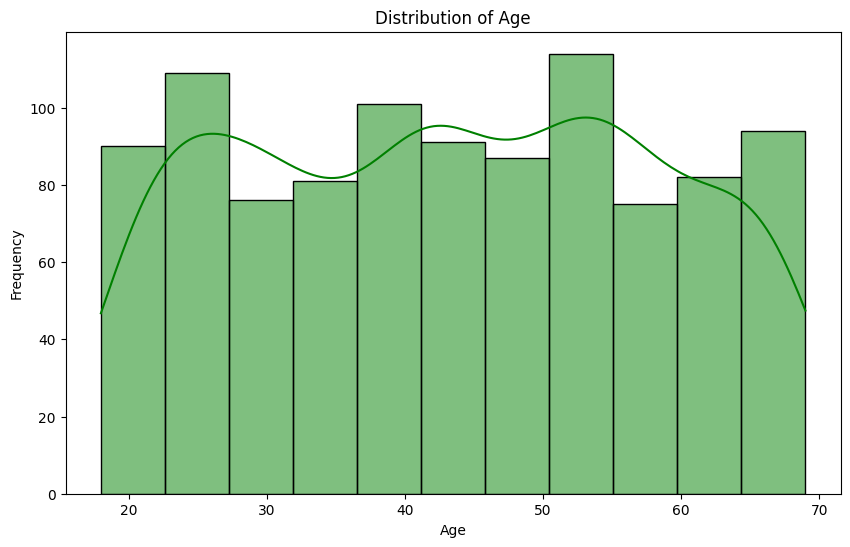

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True,color='green')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Bar chart for Product Category


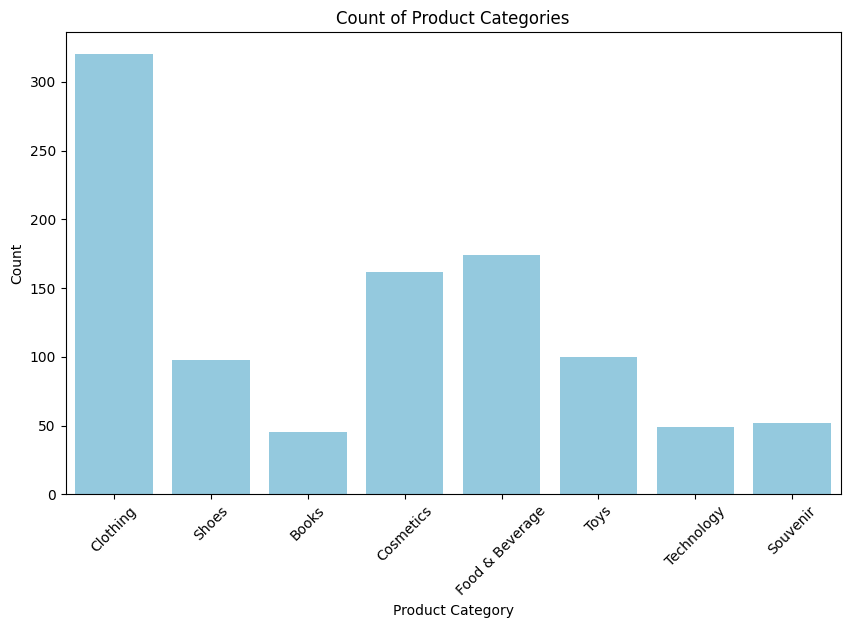

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=data,color='skyblue')
plt.title('Count of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Pair plot for numerical variables



<Figure size 1000x600 with 0 Axes>

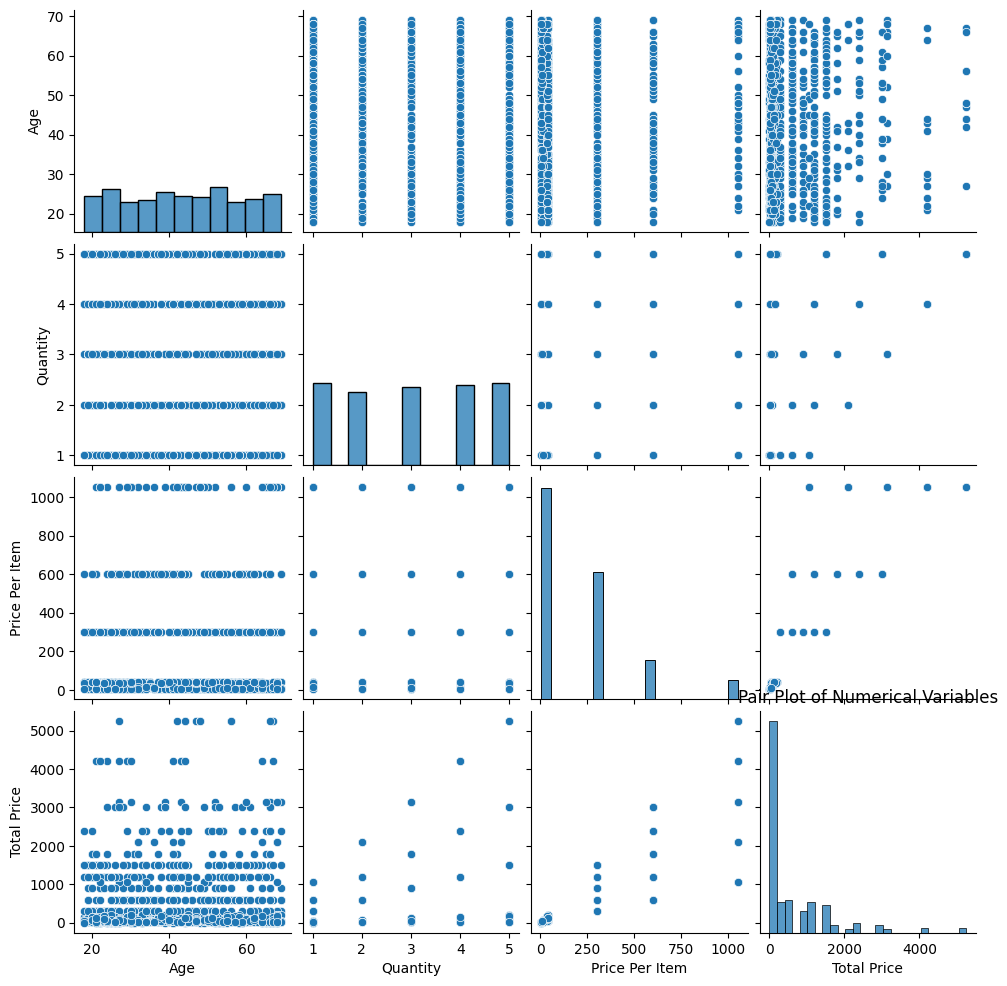

In [20]:
plt.figure(figsize=(10, 6))
sns.pairplot(data[['Age', 'Quantity', 'Price Per Item', 'Total Price']])
plt.title('Pair Plot of Numerical Variables')
plt.show()

## Correlation matrix heatmap



## Visualization of Sales



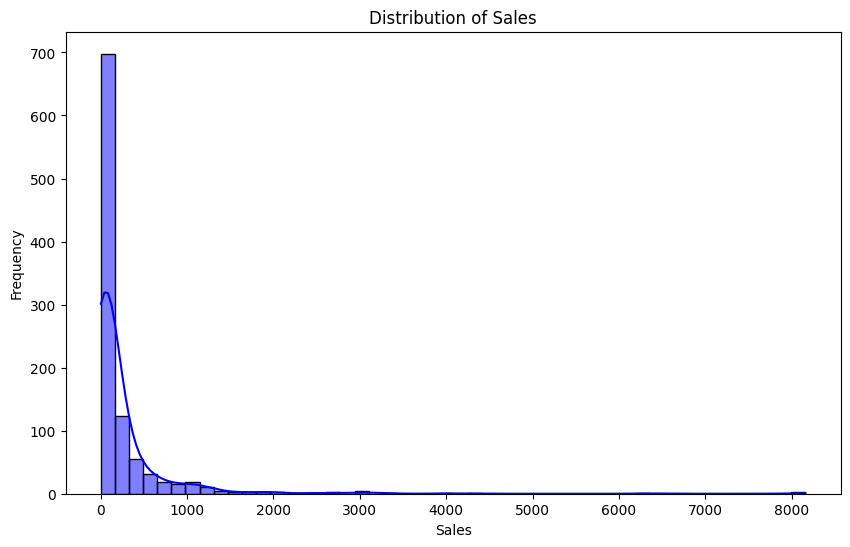

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=50, kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

## Relationships between variables (Sales by Product Category)



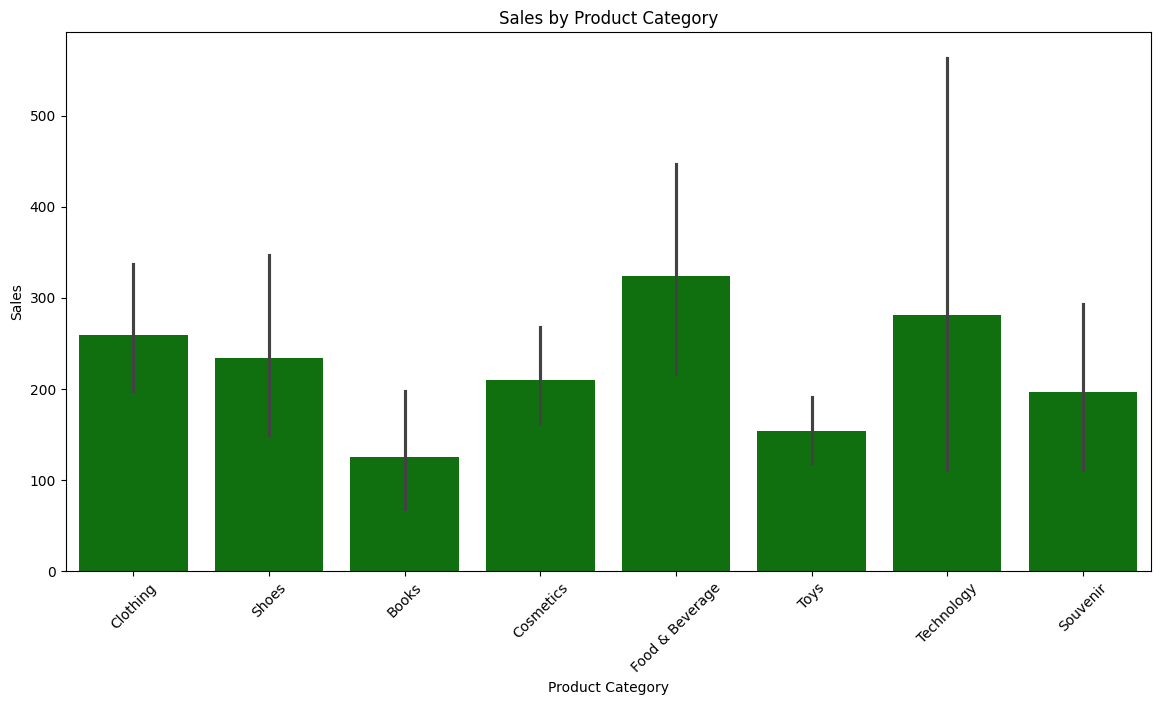

In [22]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Category', y='Sales', data=data,color="green")
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

## Convert 'Order Date' to datetime



In [23]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%b-%y')


## Extract month from 'Order Date'



In [24]:
data['Month'] = data['Order Date'].dt.to_period('M').astype(str)

## Calculate total revenue


In [25]:
total_revenue = data['Sales'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 241130.7679


## Calculate average sales per transaction


In [26]:
average_sales_per_transaction = data['Sales'].mean()
print("Average Sales per Transaction:", average_sales_per_transaction)

Average Sales per Transaction: 241.1307679


## Calculate profit margin


In [27]:
data['Profit Margin'] = (data['Sales'] / data['Total Price']) * 100
average_profit_margin = data['Profit Margin'].mean()
print("Average Profit Margin (%):", average_profit_margin)

Average Profit Margin (%): 778.7018640250581


## Identify top-selling products


In [28]:
top_selling_products = data.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(5)
print("Top Selling Products:\n", top_selling_products)

Top Selling Products:
 Category
Clothing           82831.2055
Food & Beverage    56394.0619
Cosmetics          33953.5920
Shoes              22916.0345
Toys               15392.4750
Name: Sales, dtype: float64


## Calculate Customer Lifetime Value (CLV)

In [29]:
clv = data.groupby('Customer ID')['Sales'].sum().mean()
print("Customer Lifetime Value (CLV):", clv)

Customer Lifetime Value (CLV): 666.1070936464089


## Sales Conversion Rate


In [30]:
total_customers = data['Customer ID'].nunique()
total_transactions = data['Transaction ID'].nunique()
sales_conversion_rate = (total_transactions / total_customers) * 100
print("Sales Conversion Rate (%):", sales_conversion_rate)

Sales Conversion Rate (%): 276.24309392265195


## Average Order Value (AOV)


In [31]:
average_order_value = data['Sales'].sum() / total_transactions
print("Average Order Value (AOV):", average_order_value)

Average Order Value (AOV): 241.1307679


## Monthly sales and sales growth


In [32]:
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Sales Growth'] = monthly_sales['Sales'].pct_change() * 100

## Plot monthly sales


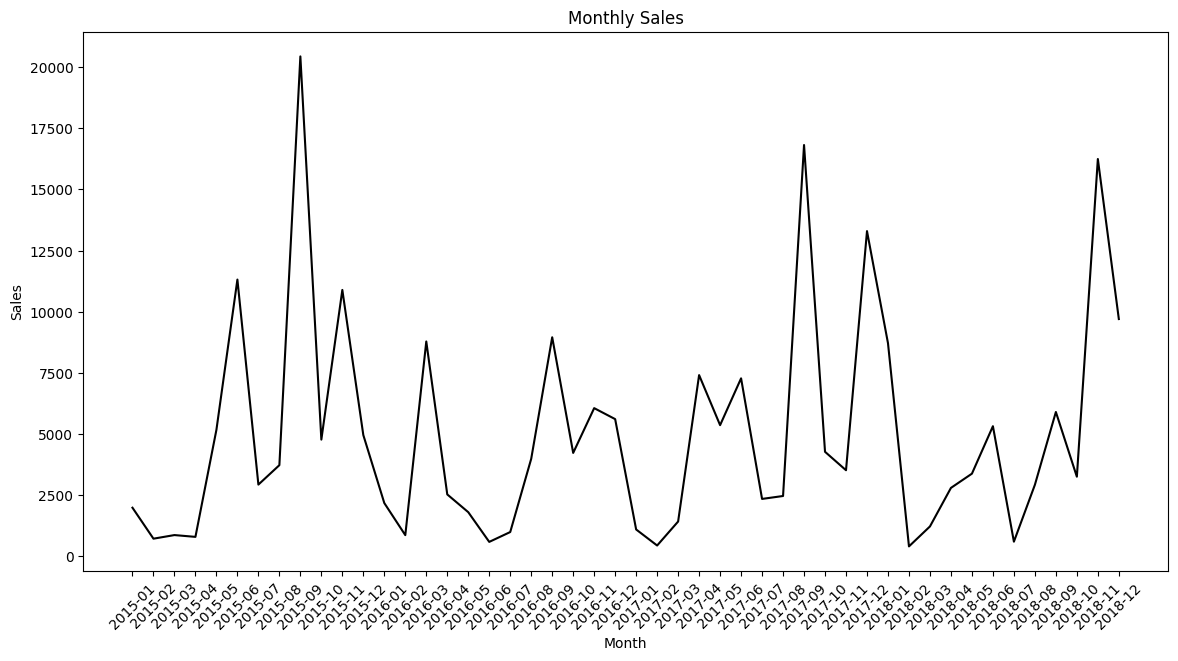

In [33]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Sales',color="black")
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

## Plot monthly sales growth


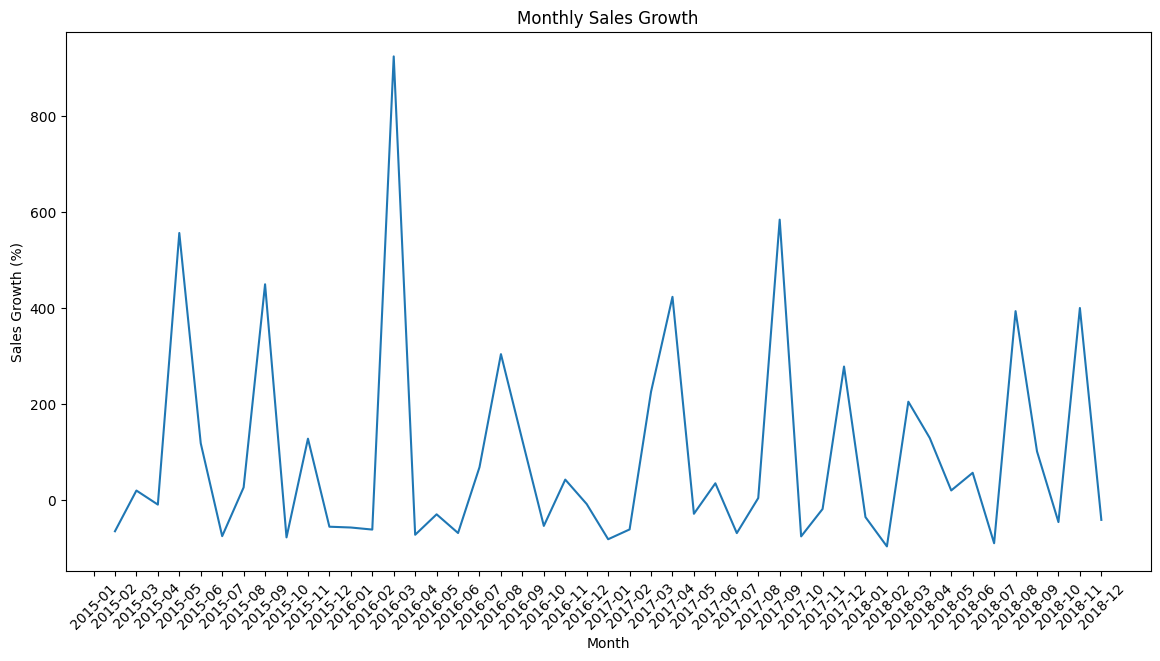

In [34]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Sales Growth')
plt.title('Monthly Sales Growth')
plt.xlabel('Month')
plt.ylabel('Sales Growth (%)')
plt.xticks(rotation=45)
plt.show()

## Customer segmentation using K-means clustering


In [35]:
customer_data = data.groupby('Customer ID').agg(
    total_spent=('Sales', 'sum'),
    total_transactions=('Sales', 'count'),
    avg_transaction_value=('Sales', 'mean')
).reset_index()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['total_spent', 'total_transactions', 'avg_transaction_value']])

## Elbow method to determine the number of clusters


In [36]:
wss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wss.append(kmeans.inertia_)

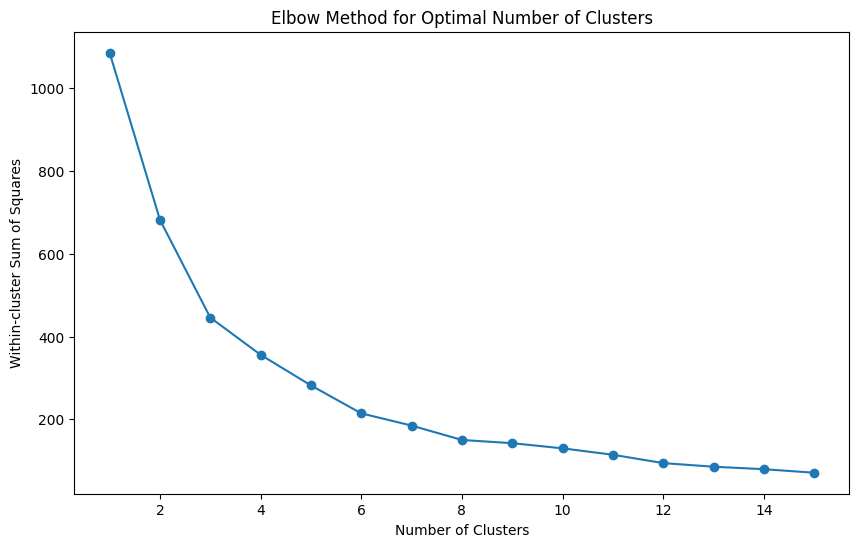

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), wss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

## Apply K-means clustering with optimal number of clusters (e.g., 5)


In [38]:
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(scaled_data)

## Visualize clusters


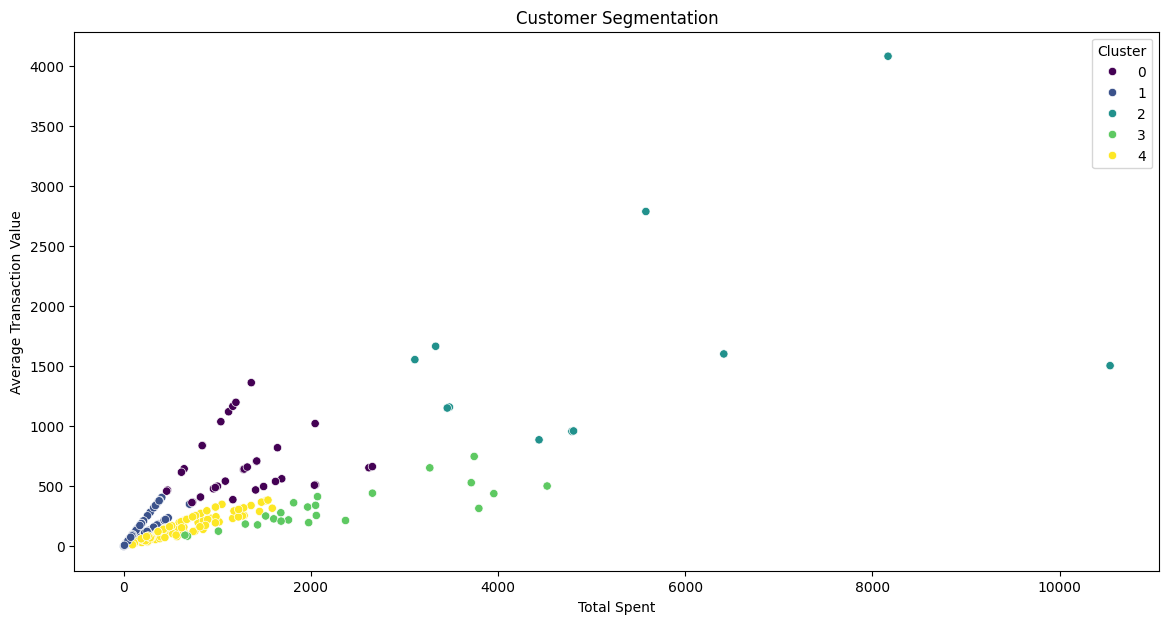

In [39]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=customer_data, x='total_spent', y='avg_transaction_value', hue='cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Spent')
plt.ylabel('Average Transaction Value')
plt.legend(title='Cluster')
plt.show()

## Product performance analysis


In [40]:
product_performance = data.groupby('Category').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Quantity': ['sum', 'mean'],
    'Price Per Item': ['mean']
}).reset_index()

## Flatten the MultiIndex columns


In [41]:
product_performance.columns = ['Category', 'Total Sales', 'Average Sales', 'Number of Transactions', 'Total Quantity', 'Average Quantity', 'Average Price Per Item']
print(product_performance)

          Category  Total Sales  Average Sales  Number of Transactions  \
0            Books    5625.4130     125.009178                      45   
1         Clothing   82831.2055     258.847517                     320   
2        Cosmetics   33953.5920     209.590074                     162   
3  Food & Beverage   56394.0619     324.103804                     174   
4            Shoes   22916.0345     233.837087                      98   
5         Souvenir   10248.6940     197.090269                      52   
6       Technology   13769.2920     281.005959                      49   
7             Toys   15392.4750     153.924750                     100   

   Total Quantity  Average Quantity  Average Price Per Item  
0             149          3.311111                   15.15  
1             946          2.956250                  300.08  
2             509          3.141975                   40.66  
3             495          2.844828                    5.23  
4             303      

## Pie chart for total sales by product category


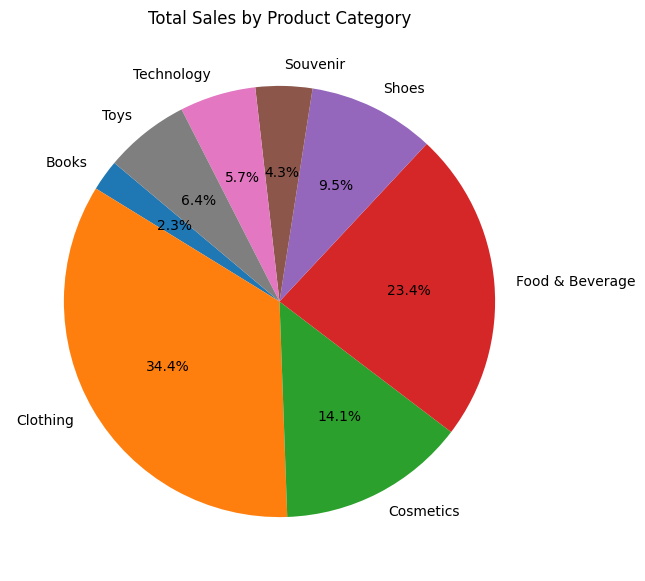

In [42]:
plt.figure(figsize=(10, 7))
plt.pie(product_performance['Total Sales'], labels=product_performance['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Product Category')
plt.show()

## Pie chart for average sales by product category


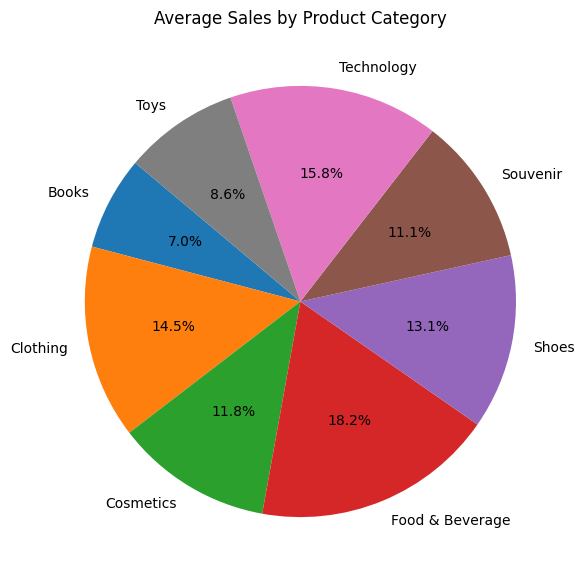

In [43]:
plt.figure(figsize=(10, 7))
plt.pie(product_performance['Average Sales'], labels=product_performance['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Average Sales by Product Category')
plt.show()

In [44]:
customer_data = data.groupby('Customer ID').agg(
    total_sales=('Sales', 'sum'),
    average_order_value=('Sales', 'mean'),
    total_orders=('Sales', 'count')
).reset_index()

## Calculate Customer Lifetime Value (CLV) assuming profit margin is 20%


In [45]:
profit_margin = 0.20
customer_data['CLV'] = customer_data['total_sales'] * profit_margin

## Sales conversion rate (assuming we have a column 'Visits')


In [46]:
if 'Visits' in data.columns:
    customer_data['conversion_rate'] = customer_data['total_orders'] / data.groupby('Customer ID')['Visits'].sum().reset_index(drop=True)

print(customer_data.head())

  Customer ID  total_sales  average_order_value  total_orders       CLV
0    AA-10375      195.138              65.0460             3   39.0276
1    AA-10480       15.552              15.5520             1    3.1104
2    AB-10060     4438.686             887.7372             5  887.7372
3    AB-10165      317.960              63.5920             5   63.5920
4    AC-10420      706.064             353.0320             2  141.2128
